# Estimating Regression with ARMA errors in Time Series Forecasting

# 1. Correlation analysis:


Correlation Coefficient between X and Y (historical data only): 0.8647


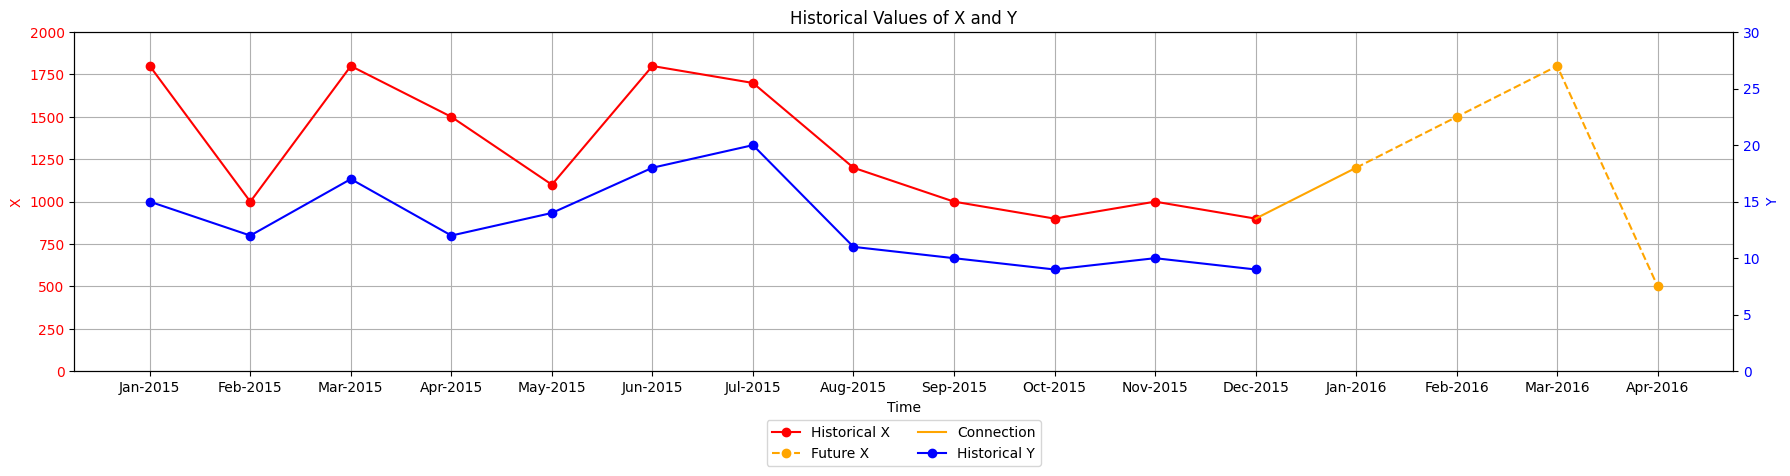

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define your data
data = {
    'Time': ['Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015',
             'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016'],
    'Y': [15, 12, 17, 12, 14, 18, 20, 11, 10, 9, 10, 9, None, None, None, None],
    'X': [1800, 1000, 1800, 1500, 1100, 1800, 1700, 1200, 1000, 900, 1000, 900, 1200, 1500, 1800, 500]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Forward fill missing values in 'Y'
df['Y'] = df['Y'].fillna(method='ffill')

# Separate historical and future data for X
historical_X = df.loc[:11, 'X']  # Only the first 12 months are historical
future_X = df.loc[12:, 'X']  # Months from Jan-2016 onwards are future

# Calculate correlation coefficient between historical X and Y
corr_coef = np.corrcoef(df['X'][:12], df['Y'][:12])[0, 1]
print(f"\nCorrelation Coefficient between X and Y (historical data only): {corr_coef:.4f}")

# Plotting X and Y on dual y-axis
fig, ax1 = plt.subplots(figsize=(18, 5))

# Plotting X on primary y-axis (left)
historical_X_plot = ax1.plot(df['Time'][:12], historical_X, marker='o', linestyle='-', color='r', label='Historical X')
future_X_plot = ax1.plot(df['Time'][12:], future_X, marker='o', linestyle='--', color='orange', label='Future X')
connect_line = ax1.plot([df['Time'][11], df['Time'][12]], [historical_X.iloc[-1], future_X.iloc[0]], linestyle='-', color='orange', label='Connection')  # Explicit label for connection line
ax1.set_xlabel('Time')
ax1.set_ylabel('X', color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_ylim([0, 2000])  # Set y-axis limits for X
ax1.grid(True)

# Creating secondary y-axis (right) for Y
ax2 = ax1.twinx()
historical_Y_plot = ax2.plot(df['Time'][:12], df['Y'][:12], marker='o', linestyle='-', color='b', label='Historical Y')
ax2.set_ylabel('Y', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylim([0, 30])  # Set y-axis limits for Y

# Title and legends
plt.title('Historical Values of X and Y')

# Combine all plots for the legend
plots = historical_X_plot + future_X_plot + connect_line + historical_Y_plot
labels = [plot.get_label() for plot in plots]
ax1.legend(plots, labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

fig.tight_layout()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()


# 2. Regression with ARMA errors forecasting 4 periods ahead

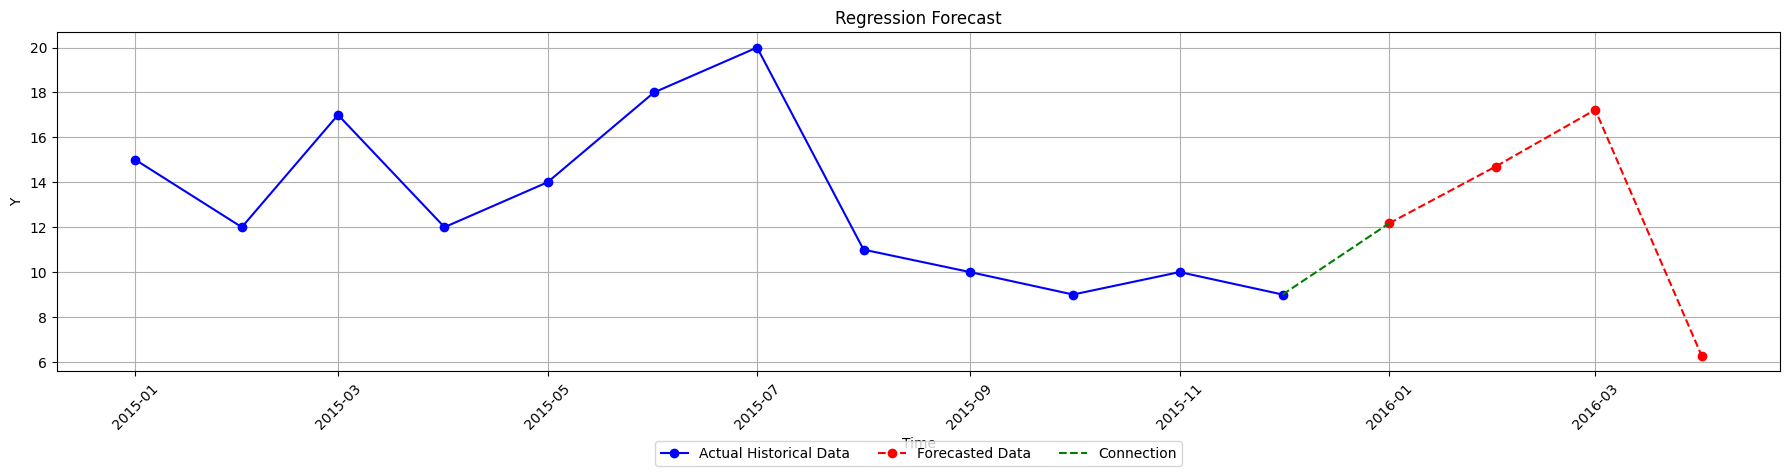


Forecasted values (Y_hat) for the future:
         Time      Y_hat
12 2016-01-01  12.170425
13 2016-02-01  14.698479
14 2016-03-01  17.226534
15 2016-04-01   6.271631


In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define your data
data = {
    'Time': ['Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015',
             'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016'],
    'Y': [15, 12, 17, 12, 14, 18, 20, 11, 10, 9, 10, 9, None, None, None, None],
    'X': [1800, 1000, 1800, 1500, 1100, 1800, 1700, 1200, 1000, 900, 1000, 900, 1200, 1500, 1800, 500]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Forward fill missing values in 'Y'
df['Y'] = df['Y'].fillna(method='ffill')

# Correctly parse 'Time' to datetime format (Month-Year)
df['Time'] = pd.to_datetime(df['Time'], format='%b-%Y', errors='coerce')

# Separate historical and future data
historical = df[df['Time'] < 'Jan-2016']
future = df[df['Time'] >= 'Jan-2016'].copy()

# Fit a linear regression model using historical data
y = historical['Y']
X = sm.add_constant(historical['X'])
model = sm.OLS(y, X)
results = model.fit()

# Predict 'Y_hat' (Y forecast) using future values of 'X'
future_X = future['X'].values.reshape(-1, 1)  # Reshape to match expected input shape
future['Y_hat'] = results.predict(sm.add_constant(future_X))

# Plotting only actual historical data and connecting with forecasted values
plt.figure(figsize=(18, 5))

# Plot actual historical data
plt.plot(historical['Time'], historical['Y'], marker='o', linestyle='-', color='b', label='Actual Historical Data')

# Plot forecasted data points
plt.plot(future['Time'], future['Y_hat'], marker='o', linestyle='--', color='r', label='Forecasted Data')

# Connect the last known actual point with the first forecasted value
plt.plot([historical['Time'].iloc[-1], future['Time'].iloc[0]],
         [historical['Y'].iloc[-1], future['Y_hat'].iloc[0]],
         linestyle='--', color='g', label='Connection')

plt.title('Regression Forecast')
plt.xlabel('Time')
plt.ylabel('Y')

# Legend at bottom center
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Display the forecasted values
print("\nForecasted values (Y_hat) for the future:")
print(future[['Time', 'Y_hat']])


# 3. Back testing

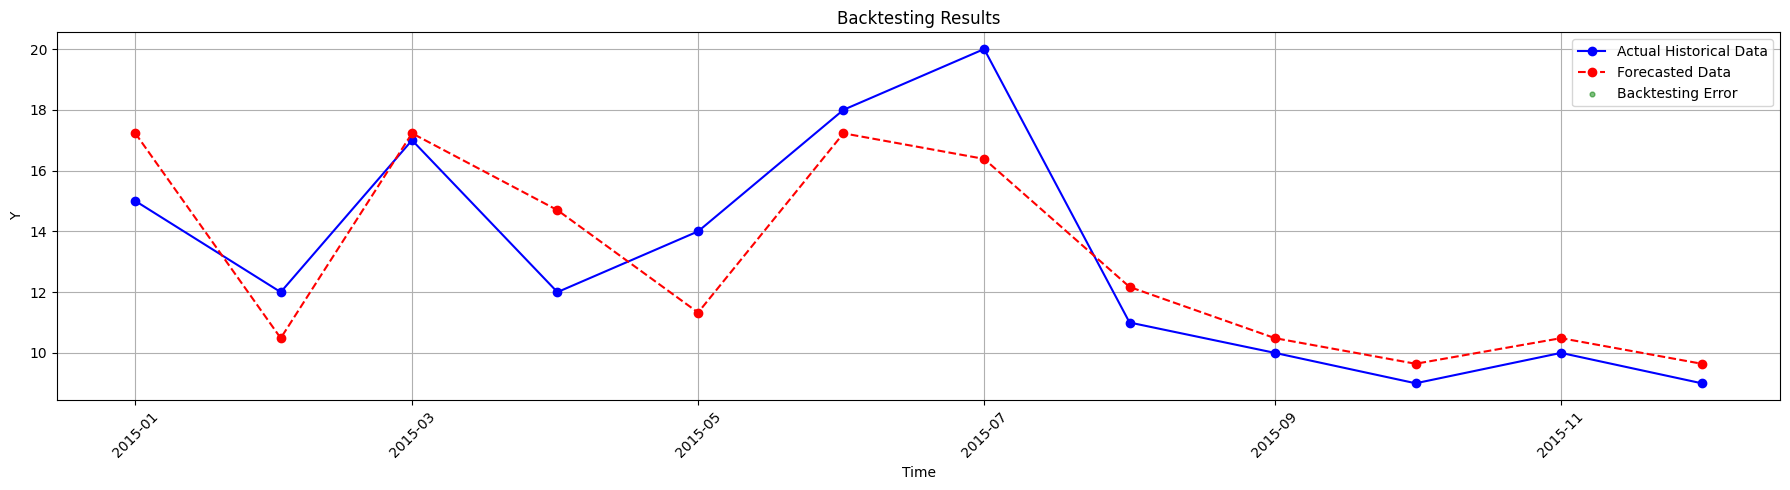


Backtesting Error:
         Time     Y      Y_hat  Backtesting_Error
0  2015-01-01  15.0  17.226534           0.148436
1  2015-02-01  12.0  10.485055           0.126245
2  2015-03-01  17.0  17.226534           0.013326
3  2015-04-01  12.0  14.698479           0.224873
4  2015-05-01  14.0  11.327740           0.190876
5  2015-06-01  18.0  17.226534           0.042970
6  2015-07-01  20.0  16.383849           0.180808
7  2015-08-01  11.0  12.170425           0.106402
8  2015-09-01  10.0  10.485055           0.048506
9  2015-10-01   9.0   9.642370           0.071374
10 2015-11-01  10.0  10.485055           0.048506
11 2015-12-01   9.0   9.642370           0.071374


In [71]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define your data
data = {
    'Time': ['Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015',
             'Jul-2015', 'Aug-2015', 'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015',
             'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016'],
    'Y': [15, 12, 17, 12, 14, 18, 20, 11, 10, 9, 10, 9, None, None, None, None],
    'X': [1800, 1000, 1800, 1500, 1100, 1800, 1700, 1200, 1000, 900, 1000, 900,
          1200, 1500, 1800, 500]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Forward fill missing values in 'Y'
df['Y'] = df['Y'].fillna(method='ffill')

# Correctly parse 'Time' to datetime format (Month-Year)
df['Time'] = pd.to_datetime(df['Time'], format='%b-%Y', errors='coerce')

# Separate historical and future data
historical = df[df['Time'] < 'Jan-2016']
future = df[df['Time'] >= 'Jan-2016'].copy()

# Fit a linear regression model using historical data
y = historical['Y']
X = sm.add_constant(historical['X'])
model = sm.OLS(y, X)
results = model.fit()

# Backtesting
backtesting_data = historical.copy()  # Use historical data for backtesting
backtesting_data['Y_hat'] = results.predict(sm.add_constant(historical['X']))

# Calculate backtesting error
backtesting_data['Backtesting_Error'] = np.abs(backtesting_data['Y_hat'] / backtesting_data['Y'] - 1)

# Plotting
plt.figure(figsize=(18, 5))

# Plot actual historical data (Y)
plt.plot(historical['Time'], historical['Y'], marker='o', linestyle='-', color='b', label='Actual Historical Data')

# Plot forecasted data points (Y_hat)
plt.plot(historical['Time'], backtesting_data['Y_hat'], marker='o', linestyle='--', color='r', label='Forecasted Data')

# Plot backtesting errors as markers
plt.scatter(historical['Time'], historical['Y'], s=100 * backtesting_data['Backtesting_Error'],
            color='g', alpha=0.5, label='Backtesting Error')

plt.title('Backtesting Results')
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the backtesting error for each data point
print("\nBacktesting Error:")
print(backtesting_data[['Time', 'Y', 'Y_hat', 'Backtesting_Error']])


# 3. Adding more predictors to Regression with ARMA errors:

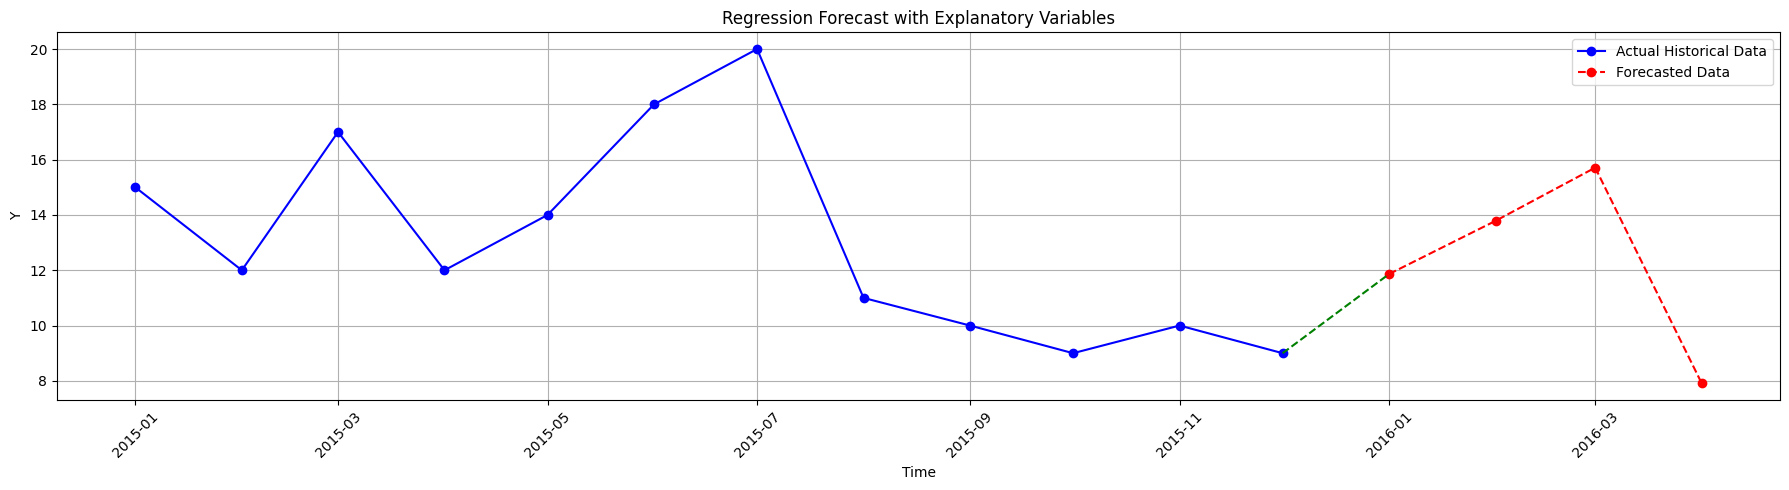


Forecasted values (Y_hat) for the future:
         Time      Y_hat
12 2016-01-01  11.863425
13 2016-02-01  13.787079
14 2016-03-01  15.710732
15 2016-04-01   7.912277


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
# Define your data with additional explanatory variables
data = {
    'Time': ['Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015',
             'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016'],
    'Y': [15, 12, 17, 12, 14, 18, 20, 11, 10, 9, 10, 9, None, None, None, None],
    'X1': [1800, 1000, 1800, 1500, 1100, 1800, 1700, 1200, 1000, 900, 1000, 900, 1200, 1500, 1800, 500],
    'X2': [5, 3, 6, 2, 4, 7, 8, 3, 2, 1, 2, 1, 3, 4, 5, 1],  # Example explanatory variable
    'X3': [10, 8, 12, 7, 9, 13, 15, 8, 6, 4, 5, 4, 7, 9, 11, 3]  # Another example explanatory variable
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Forward fill missing values in 'Y'
df['Y'] = df['Y'].fillna(method='ffill')

# Correctly parse 'Time' to datetime format (Month-Year)
df['Time'] = pd.to_datetime(df['Time'], format='%b-%Y', errors='coerce')

# Separate historical and future data
historical = df[df['Time'] < 'Jan-2016']
future = df[df['Time'] >= 'Jan-2016'].copy()

# Fit a linear regression model using historical data and multiple predictors
y = historical['Y']
X = sm.add_constant(historical[['X1', 'X2', 'X3']])  # Include explanatory variables
model = sm.OLS(y, X)
results = model.fit()

# Predict 'Y_hat' (Y forecast) using future values of explanatory variables
future_X = sm.add_constant(future[['X1', 'X2', 'X3']])
future['Y_hat'] = results.predict(future_X)

# Plotting only actual historical data and connecting with forecasted values
plt.figure(figsize=(18, 5))

# Plot actual historical data
plt.plot(historical['Time'], historical['Y'], marker='o', linestyle='-', color='b', label='Actual Historical Data')

# Plot forecasted data points
plt.plot(future['Time'], future['Y_hat'], marker='o', linestyle='--', color='r', label='Forecasted Data')

# Connect the last known actual point with the first forecasted value
plt.plot([historical['Time'].iloc[-1], future['Time'].iloc[0]],
         [historical['Y'].iloc[-1], future['Y_hat'].iloc[0]],
         linestyle='--', color='g')

plt.title('Regression Forecast with Explanatory Variables')
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("\nForecasted values (Y_hat) for the future:")
print(future[['Time', 'Y_hat']])
